# Credit Risk Data Cleaning & EDA

### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as stats
import seaborn as sns
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
loans_2007 = pd.read_csv("../data/loans_2007.csv")

C:\Users\retro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|id|object|all|A unique LC assigned ID for the loan listing|
|member_id|float64|all|A unique LC assigned Id for the borrower member|
|loan_amnt|float64|all|The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
|funded_amnt|float64|all|The total amount committed to that loan at that point in time|
|funded_amnt_inv|float64|all|The total amount committed by investors for that loan at that point in time.|
|term|object|all|The number of payments on the loan. Values are in months and can be either 36 or 60|
|int_rate|object|all|Interest Rate on the loan|
|installment|float64|all|The monthly payment owed by the borrower if the loan originates.|
|grade|object|all|LC assigned loan grade|
|sub_grade|object|all|LC assigned loan subgrade|
|emp_title|object|all|The job title supplied by the Borrower when applying for the loan|
|emp_length|object|all|Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years|
|home_ownership|object|all|The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER|
|annual_inc|float64|all|The self-reported annual income provided by the borrower during registration.|
|verification_status|object|all|Indicates if income was verified by LC, not verified, or if the income source was verified|
|issue_d|object|all|The month which the loan was funded|
|loan_status|object|all|Current status of the loan|
|pymnt_plan|object|all|Indicates if a payment plan has been put in place for the loan|
|purpose|object|all|A category provided by the borrower for the loan request|
|title|object|all|The loan title provided by the borrower|
|zip_code|object|all|The first 3 numbers of the zip code provided by the borrower in the loan application.|
|addr_state|object|all|The state provided by the borrower in the loan application|
|dti|float64|all|A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income|
|delinq_2yrs|float64|all|The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years|
|earliest_cr_line|object|all|The month the borrower's earliest reported credit line was opened|
|inq_last_6mths|float64|all|The number of inquiries in past 6 months (excluding auto and mortgage inquiries)|
|open_acc|float64|all|The number of open credit lines in the borrower's credit file|
|pub_rec|float64|all|Number of derogatory public records|
|revol_bal|float64|all|Total credit revolving balance|
|revol_util|object|all|Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit|
|total_acc|float64|all|The total number of credit lines currently in the borrower's credit file|
|initial_list_status|object|all|The initial listing status of the loan. Possible values are – W, F|
|out_prncp|float64|all|Remaining outstanding principal for total amount funded|
|out_prncp_inv|float64|all|Remaining outstanding principal for portion of total amount funded by investors|
|total_pymnt|float64|all|Payments received to date for total amount funded|
|total_pymnt_inv|float64|all|Payments received to date for portion of total amount funded by investors|
|total_rec_prncp|float64|all|Principal received to date|
|total_rec_int|float64|all|Interest received to date|
|total_rec_late_fee|float64|all|Late fees received to date|
|recoveries|float64|all|post charge off gross recovery|
|collection_recovery_fee|float64|all|post charge off collection fee|
|last_pymnt_d|object|all|Last month payment was received|
|last_pymnt_amnt|float64|all|Last total payment amount received|
|last_credit_pull_d|object|all|The most recent month LC pulled credit for this loan|
|collections_12_mths_ex_med|float64|all|Number of collections in 12 months excluding medical collections|
|policy_code|float64|all|publicly available policy_code=1new products not publicly available policy_code=2|
|application_type|object|all|Indicates whether the loan is an individual application or a joint application with two co-borrowers|
|acc_now_delinq|float64|all|The number of accounts on which the borrower is now delinquent|
|chargeoff_within_12_mths|float64|all|Number of charge-offs within 12 months|
|delinq_amnt|float64|all|The past-due amount owed for the accounts on which the borrower is now delinquent|
|pub_rec_bankruptcies|float64|all|Number of public record bankruptcies|
|tax_liens|float64|all|Number of tax liens|

### Data Cleaning and Exploratory Data Analysis

In [3]:
#Display data types
loans_2007.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

In [4]:
#Display first row
print(loans_2007.iloc[1])

id                                    1077430
member_id                         1.31417e+06
loan_amnt                                2500
funded_amnt                              2500
funded_amnt_inv                          2500
term                                60 months
int_rate                               15.27%
installment                             59.83
grade                                       C
sub_grade                                  C4
emp_title                               Ryder
emp_length                           < 1 year
home_ownership                           RENT
annual_inc                              30000
verification_status           Source Verified
issue_d                              Dec-2011
loan_status                       Charged Off
pymnt_plan                                  n
purpose                                   car
title                                    bike
zip_code                                309xx
addr_state                        

In [5]:
# Remove view limitation
pd.set_option('display.max_columns', None)

In [6]:
#Display data head
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [7]:
#Display data tail
loans_2007.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,NaN,< 1 year,RENT,110000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Car repair bill,100xx,NY,10.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,2904.498829,258.82,2525.0,379.50,0.0,0.0,0.0,Jun-2010,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,NaN,< 1 year,NONE,NaN,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Buying a car,100xx,NY,4.00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,7373.904962,0.00,6500.0,873.90,0.0,0.0,0.0,Jun-2010,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,Homemaker,10+ years,MORTGAGE,70000.0,Not Verified,Jun-2007,Does not meet the credit policy. Status:Fully ...,n,other,Aroundthehouse,068xx,CT,8.81,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,f,0.0,0.0,5619.762090,0.00,5000.0,619.76,0.0,0.0,0.0,Jun-2010,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Display data shape
loans_2007.shape

(42538, 52)

In [9]:
#Display data type of each column
loans_2007.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

In [10]:
#Overview of each numeric feature
summary = loans_2007.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
member_id,42535.0,825702.551170,279540.905635,70473.00,638479.500000,824178.000000,1.033946e+06,1.314167e+06
loan_amnt,42535.0,11089.722581,7410.938391,500.00,5200.000000,9700.000000,1.500000e+04,3.500000e+04
funded_amnt,42535.0,10821.585753,7146.914675,500.00,5000.000000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,42535.0,10139.830603,7131.686446,0.00,4950.000000,8500.000000,1.400000e+04,3.500000e+04
installment,42535.0,322.623063,208.927216,15.67,165.520000,277.690000,4.281800e+02,1.305190e+03
annual_inc,42531.0,69136.556420,64096.349719,1896.00,40000.000000,59000.000000,8.250000e+04,6.000000e+06
dti,42535.0,13.373043,6.726315,0.00,8.200000,13.470000,1.868000e+01,2.999000e+01
delinq_2yrs,42506.0,0.152449,0.512406,0.00,0.000000,0.000000,0.000000e+00,1.300000e+01
inq_last_6mths,42506.0,1.081424,1.527455,0.00,0.000000,1.000000,2.000000e+00,3.300000e+01
open_acc,42506.0,9.343951,4.496274,1.00,6.000000,9.000000,1.200000e+01,4.700000e+01


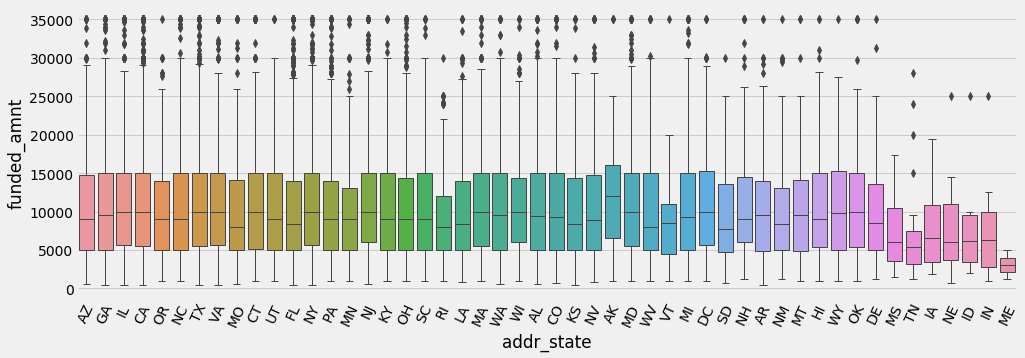

In [11]:
#The loans seems to be pretty evenly distributed across all states except Nebraska(NE) which is non existent
#The state of Idaho(ID), Iowa(IA), Tennessee(TN) and Mississippi(MS) are well below the median distribution
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)

ax = sns.boxplot(x="addr_state", y="funded_amnt", data=loans_2007, linewidth=1.0);
plt.xticks(rotation=65);

In [12]:
#Dropping unnecessary columns
loans_2007.drop(['id', 
                 'member_id', 
                 'sub_grade',
                 'emp_title', 
                 'issue_d', 
                 'title',
                 'zip_code',
                 'addr_state',
                 'earliest_cr_line', 
                 'last_pymnt_d', 
                 'last_credit_pull_d'], axis = 1,inplace=True)

In [13]:
#Display first row
print(loans_2007.iloc[0])

loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
dti                                 27.65
delinq_2yrs                             0
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
out_prncp                         

In [14]:
#Remove all rows from loans_2007 that contain values other than Fully Paid or Charged Off for the loan_status column
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [15]:
#Remove any columns from loans_2007 that contain only one unique value
orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)

['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [16]:
#select columns of object type from loans and assign the Dataframe object_columns_df
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
grade                            B
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
purpose                credit_card
revol_util                   83.7%
Name: 0, dtype: object


In [17]:
#Display the unique value counts for cols
cols = ['home_ownership', 'verification_status', 'emp_length', 'term']
for c in cols:
    print(loans[c].value_counts())

RENT        18550
MORTGAGE    17127
OWN          2992
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16732
Verified           12301
Source Verified     9737
Name: verification_status, dtype: int64
10+ years    8547
< 1 year     4527
2 years      4308
3 years      4026
4 years      3362
5 years      3209
1 year       3183
6 years      2181
7 years      1718
8 years      1444
9 years      1229
Name: emp_length, dtype: int64
 36 months    29096
 60 months     9674
Name: term, dtype: int64


In [18]:
#Display the columns of unique values
#print(loans["title"].value_counts())
print(loans["purpose"].value_counts())

debt_consolidation    18145
credit_card            5042
other                  3880
home_improvement       2902
major_purchase         2161
small_business         1766
car                    1512
wedding                 930
medical                 682
moving                  578
vacation                376
house                   369
educational             325
renewable_energy        102
Name: purpose, dtype: int64


In [19]:
#Remove "years" and "%" from int_rate and revol_util then convert into float
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [20]:
#Convert loans grade into good or not
loans["grade"] = loans["grade"].map({"A": 1, "B":1, "C":1, "D":0, "E":0, "F":0})

In [21]:
#Convert into float
loans["grade"] = loans["grade"].astype("float")

In [22]:
#Check for missing values
loans.isnull().sum().sort_values(ascending = False)

emp_length                 1036
pub_rec_bankruptcies        697
grade                       301
revol_util                   50
dti                           0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
delinq_2yrs                   0
last_pymnt_amnt               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
loan_amnt                     0
dtype: int64

In [23]:
#Drop rows with na and reset index
loans = loans.dropna()
loans.reset_index(drop=True)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,1.0,10.0,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,1.0,0.0,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,1.0,10.0,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,1.0,10.0,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
4,5000.0,5000.0,5000.0,36 months,7.90,156.46,1.0,3.0,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36689,4800.0,4800.0,1100.0,36 months,10.28,155.52,1.0,1.0,RENT,35000.0,Not Verified,1,debt_consolidation,7.51,0.0,0.0,11.0,1.0,5836.0,68.7,12.0,5134.085288,1176.56,4800.00,334.09,0.00,0.00,0.00,3891.08,1.0
36690,7000.0,7000.0,1000.0,36 months,10.59,227.82,1.0,3.0,MORTGAGE,63500.0,Not Verified,1,debt_consolidation,8.50,0.0,1.0,9.0,1.0,14930.0,79.0,21.0,8174.021910,1167.72,7000.00,1174.02,0.00,0.00,0.00,1571.29,1.0
36691,9000.0,9000.0,700.0,36 months,12.49,301.04,0.0,8.0,MORTGAGE,39000.0,Not Verified,0,debt_consolidation,5.08,0.0,3.0,9.0,1.0,26233.0,62.9,37.0,4015.960000,311.64,1496.83,609.26,0.00,1909.87,668.36,301.05,1.0
36692,15450.0,15450.0,600.0,36 months,11.22,507.46,1.0,2.0,MORTGAGE,40000.0,Not Verified,0,debt_consolidation,13.50,0.0,3.0,13.0,1.0,6513.0,34.3,29.0,11652.750000,451.73,8688.59,2659.96,0.00,304.20,3.09,1016.15,1.0


In [24]:
#Determine if there are missing values remaining
loans.isnull().sum().sort_values(ascending = False)

pub_rec_bankruptcies       0
last_pymnt_amnt            0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
loan_amnt                  0
dtype: int64

In [25]:
#Determine value counts of distribution
loans.loan_status.value_counts()

1    31519
0     5175
Name: loan_status, dtype: int64

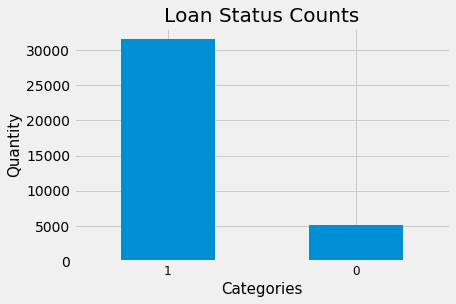

In [26]:
# visualize the quantities
loans['loan_status'].value_counts().plot.bar()
plt.title('Loan Status Counts', size = 20)
plt.xlabel('Categories', size = 15)
plt.ylabel('Quantity', size = 15)
plt.xticks(rotation = 0, size = 12);

In [27]:
#Normalization of imbalance data set
loans.loan_status.value_counts(normalize=True)

1    0.858969
0    0.141031
Name: loan_status, dtype: float64

Around 14% of our list of the loans were defaulted, which represents heavy imbalance and will cause poor model performance. This is expected to be a low percentage, since Lending Club would not approve loans if they thought the borrowers would default.

The term "Charged off" is when a creditor, Lending Club in this case, gives up hope you will repay the money after months of not paying the mininum payments and writes off the debt. Learn more about it in this article from Marketwatch. https://www.marketwatch.com/story/everything-you-need-to-know-about-a-charged-off-debt-2019-08-15

In [28]:
#Establish baseline
print('baseline score:0.858969')

baseline score:0.858969


In [29]:
#Encode cat_columns as integer values
cat_columns = ["home_ownership", "verification_status", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)

In [30]:
#Define function
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)
    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [31]:
#Display data shape/types & summary
details = rstr(loans_2007, 'funded_amnt')
display(details.sort_values(by='corr funded_amnt', ascending=False))

Data shape: (38770, 41)
___________________________
Data types:
 float64    29
object     11
int64       1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr funded_amnt
funded_amnt,float64,38770,1020,0,0.000000,"[[5000.0, 2500.0, 2400.0, 10000.0, 7000.0, 300...",1.099382,1.009443,1.000000
loan_amnt,float64,38770,870,0,0.000000,"[[5000.0, 2500.0, 2400.0, 10000.0, 7000.0, 300...",1.075110,0.831011,0.981625
installment,float64,38770,15091,0,0.000000,"[[162.87, 59.83, 84.33, 339.31, 156.46, 170.08...",1.147272,1.309182,0.957761
funded_amnt_inv,float64,38770,8078,0,0.000000,"[[4975.0, 2500.0, 2400.0, 10000.0, 5000.0, 700...",1.124877,1.144980,0.956482
total_pymnt,float64,38770,38639,0,0.000000,"[[5863.1551866952, 1008.71, 3005.6668441393, 1...",1.357309,2.093937,0.899010
total_rec_prncp,float64,38770,6850,0,0.000000,"[[5000.0, 456.46, 2400.0, 10000.0, 7000.0, 300...",1.147557,1.211277,0.865088
total_pymnt_inv,float64,38770,36572,0,0.000000,"[[5833.84, 1008.71, 3005.67, 12231.89, 5632.21...",1.373085,2.142953,0.865046
total_rec_int,float64,38770,34198,0,0.000000,"[[863.16, 435.17, 605.67, 2214.92, 632.21, 313...",2.684690,9.960610,0.735822
last_pymnt_amnt,float64,38770,34554,0,0.000000,"[[171.62, 119.66, 649.91, 357.48, 161.03, 1313...",2.671315,8.599594,0.475606
revol_bal,float64,38770,21348,0,0.000000,"[[13648.0, 1687.0, 2956.0, 5598.0, 7963.0, 177...",3.210210,15.042367,0.306646


In [32]:
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36694 entries, 0 to 39749
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            36694 non-null  float64
 1   funded_amnt                          36694 non-null  float64
 2   funded_amnt_inv                      36694 non-null  float64
 3   int_rate                             36694 non-null  float64
 4   installment                          36694 non-null  float64
 5   grade                                36694 non-null  float64
 6   emp_length                           36694 non-null  float64
 7   annual_inc                           36694 non-null  float64
 8   loan_status                          36694 non-null  int64  
 9   dti                                  36694 non-null  float64
 10  delinq_2yrs                          36694 non-null  float64
 11  inq_last_6mths              

In [33]:
#Define function
def plotting(loans, columns, target, num_cols=2):
    fig = plt.figure(figsize=(6*num_cols,4*round(len(columns)/num_cols)))
    for col_number, col_name in enumerate(columns):   
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, col_number + 1)
        if df[col_name].dtype!='object':
            plt.scatter(df[col_name], df[target])
            plt.xlabel(col_name)
            plt.ylabel(target)
        else:
            sns.boxplot(x=target, y=col_name, data=df)            

    fig.tight_layout()

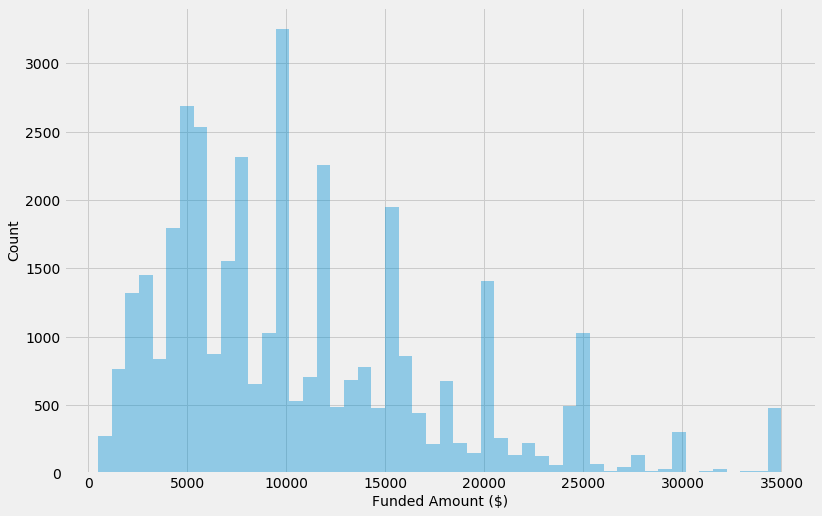

In [34]:
#Plot to examine the target variable: funded_amnt
plt.figure(figsize=(12, 8))
sns.distplot(loans.funded_amnt, kde=False)
plt.xlabel('Funded Amount ($)', size=14)
plt.ylabel('Count', size=14);

In [35]:
#Measure the skewness of distribution
stats.skew(loans["funded_amnt"])

1.1012503627767052

This data are moderately and positively skewed to the right; It has a long tail with its mean is to the right of the mode and median

In [36]:
#Measure the kurtosis of distribution
stats.kurtosis(loans["funded_amnt"])

1.0364287163524546

This belongs to a Platykurtic distribution because its kurtosis is almost one, which is less than 3, thus exhibiting less kurtosis with shorter, thinner tails relative a normal distribution.

In [37]:
#Display numeric correlations between different features and target variable
numeric_features = loans.select_dtypes(include=[np.number])
numeric_features.dtypes

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
grade                                  float64
emp_length                             float64
annual_inc                             float64
loan_status                              int64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
total_rec_lat

In [38]:
#Determine top predictors of funded_amnt 
corr = numeric_features.corr()
print (corr['funded_amnt'].sort_values(ascending=False)[:10], '\n')
print (corr['funded_amnt'].sort_values(ascending=False)[-10:])

funded_amnt                     1.000000
loan_amnt                       0.981183
funded_amnt_inv                 0.971819
installment                     0.956539
total_pymnt                     0.901549
total_pymnt_inv                 0.878856
total_rec_prncp                 0.868899
total_rec_int                   0.736118
last_pymnt_amnt                 0.473858
verification_status_Verified    0.416057
Name: funded_amnt, dtype: float64 

purpose_vacation                      -0.073628
purpose_moving                        -0.076544
verification_status_Source Verified   -0.088055
purpose_major_purchase                -0.101038
purpose_car                           -0.117324
purpose_other                         -0.140187
home_ownership_RENT                   -0.149564
grade                                 -0.216412
verification_status_Not Verified      -0.314103
term_ 36 months                       -0.318657
Name: funded_amnt, dtype: float64


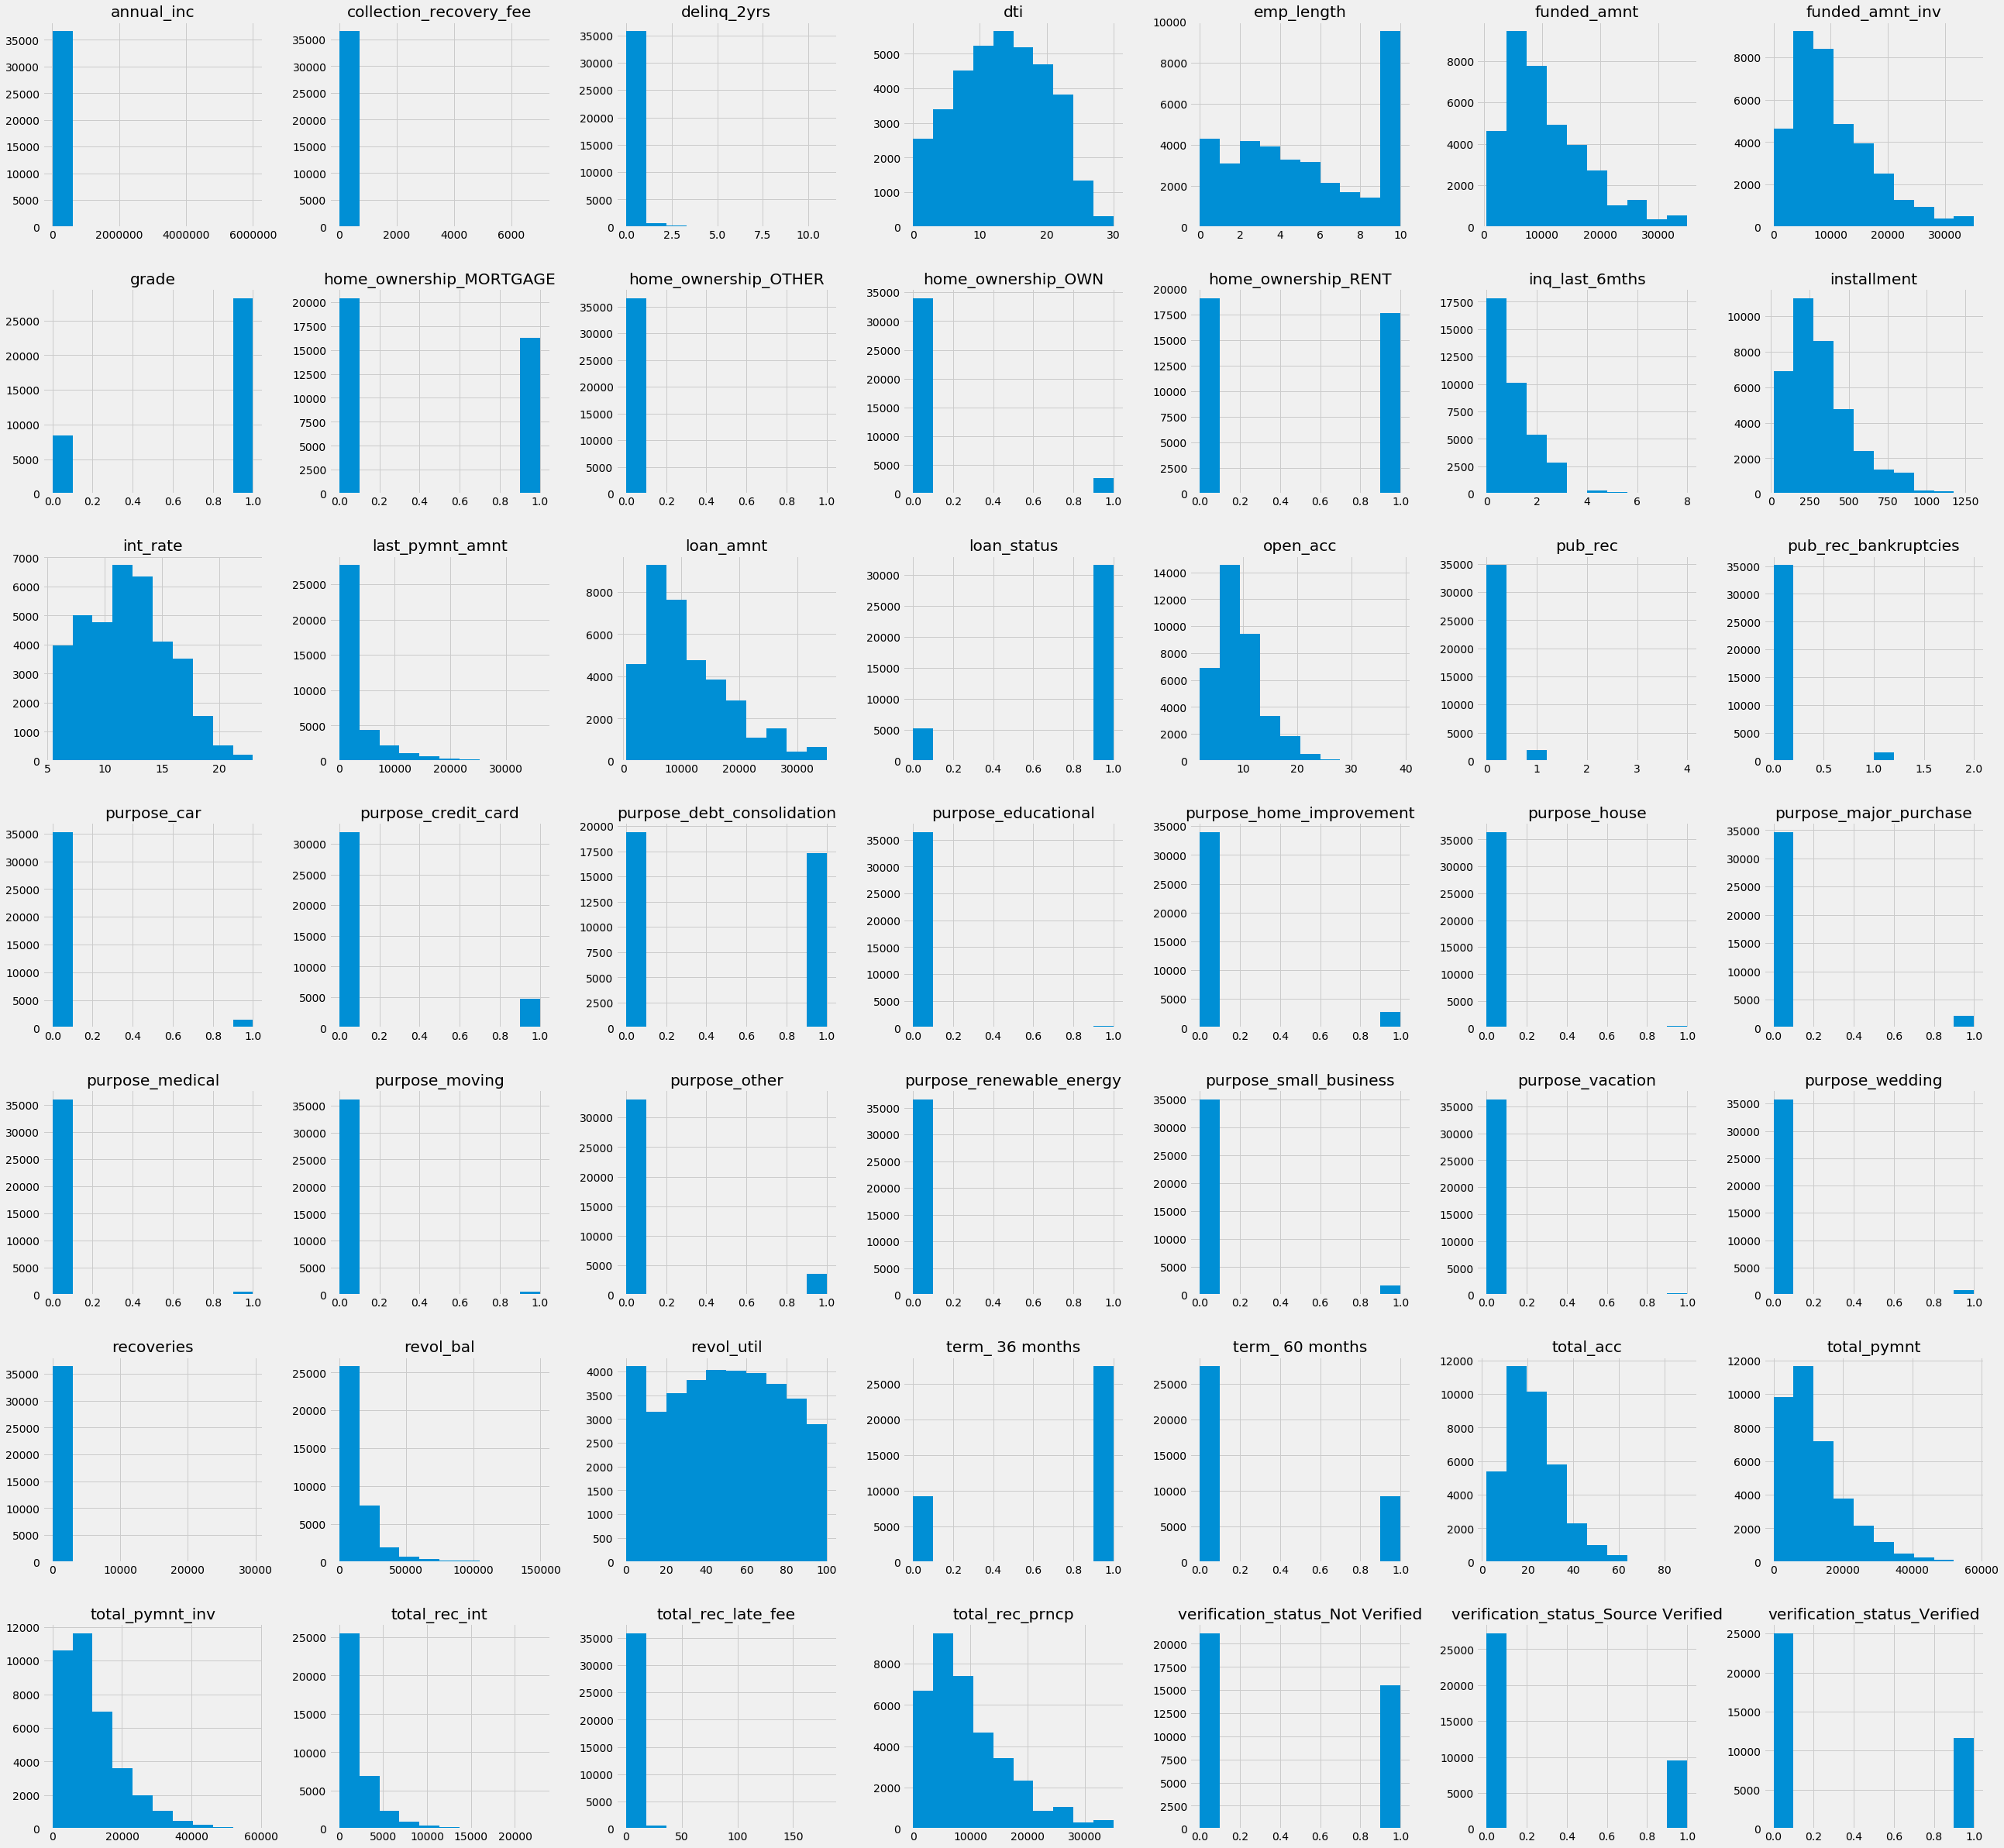

In [39]:
#Create histograms of all numerical columns
loans.hist(figsize=(40, 40));

In [ ]:
#Display boxplot
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

#Box plot loan_amnt/funded_amnt
fig1 = fig.add_subplot(221); 
sns.boxplot(x='loan_amnt', 
                y='funded_amnt', data=loans[['funded_amnt', 'loan_amnt']])

#funded_amnt_inv vs funded_amnt plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = loans['funded_amnt_inv'], 
                y = loans.funded_amnt, palette= 'Spectral')

#installment vs funded_amnt plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = loans['installment'], 
                y = loans.funded_amnt, palette= 'Spectral')

#total_pymnt vs funded_amnt plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = loans['total_pymnt'], 
                y = loans.funded_amnt, palette= 'Spectral')

#verification_status_Not Verified vs funded_amnt plot
fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = loans.funded_amnt, 
                x = loans['verification_status_Not Verified'], palette= 'YlOrRd')

#term_ 36 months vs funded_amnt plot
fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = loans.funded_amnt, 
                x = loans['term_ 36 months'], palette= 'YlOrRd')

plt.tight_layout(); plt.show()

In [ ]:
#Summary of target variable:funded_amnt
loans.funded_amnt.describe()

In [ ]:
#Boxplot where IQR around 5500 to 15000 and median = 9600
sns.boxplot(loans['funded_amnt'])

In [ ]:
#Using Seaborn's heatmap with to visualize correlations between all numeric features

fig, ax = plt.subplots(figsize=(50,50))
mask = np.zeros_like(numeric_features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(numeric_features.corr(), annot=True, cmap="RdBu", mask=mask, ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=20)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=20)
plt.show()

In [ ]:
#assign dataframe
loans_cleaned = pd.DataFrame(loans)

In [ ]:
#save as csv file
pd.DataFrame(loans).to_csv('loans_cleaned.csv')

In [ ]:
#check dataframe
loans.describe